#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [2]:
# Read CSV
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [3]:
is_duplicate = df.duplicated().any()
print(is_duplicate)

True


In [4]:
df = df.drop_duplicates()

Periksa apakah ada missing values

In [5]:
missing_values = df.isnull().any()
print(missing_values)

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool


Periksa outlier dengan boxplot untuk setiap kolom feature

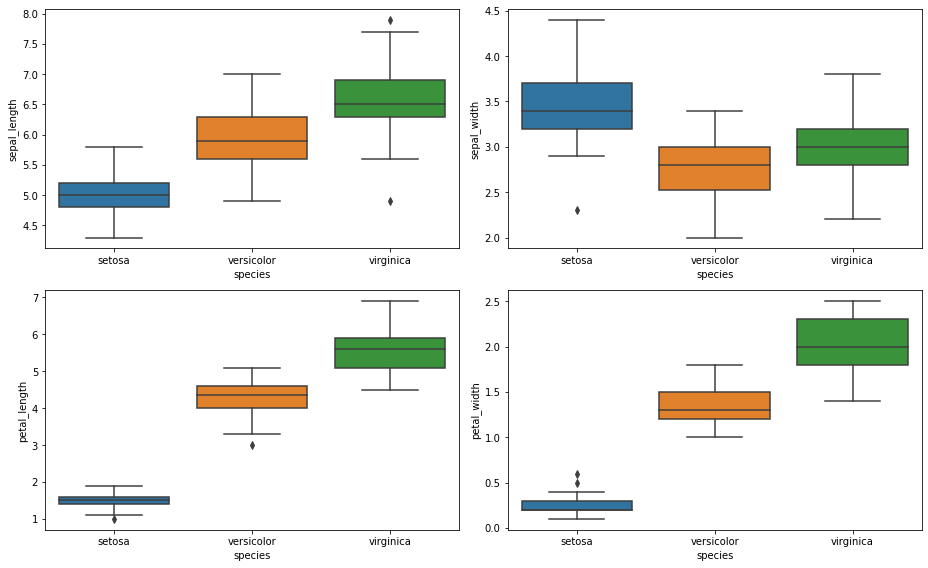

In [6]:
plt.figure(figsize=(13, 8))

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=column, data=df)

plt.tight_layout()
plt.show()

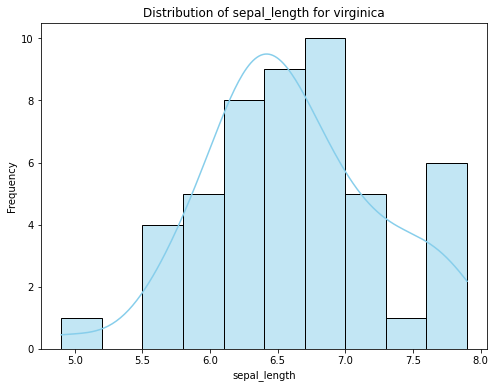

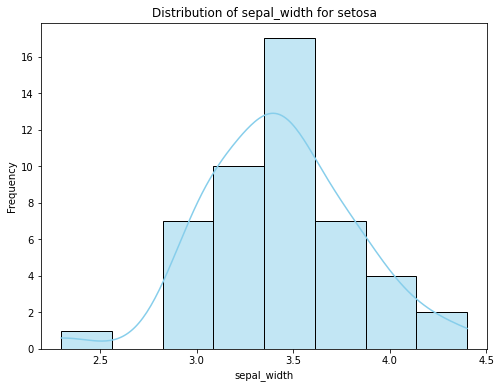

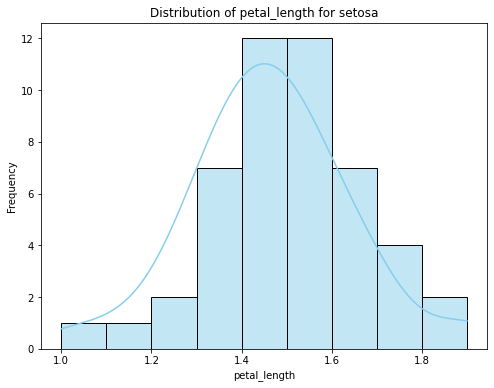

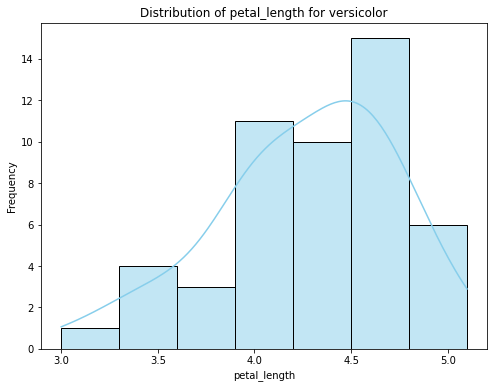

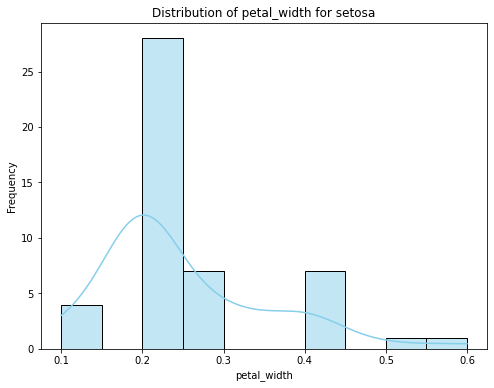

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(data, feature_name, class_name):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data[data['species'] == class_name], x=feature_name, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature_name} for {class_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.show()

plot_distribution(df, 'sepal_length', 'virginica')
plot_distribution(df, 'sepal_width', 'setosa')
plot_distribution(df, 'petal_length', 'setosa')
plot_distribution(df, 'petal_length', 'versicolor')
plot_distribution(df, 'petal_width', 'setosa')

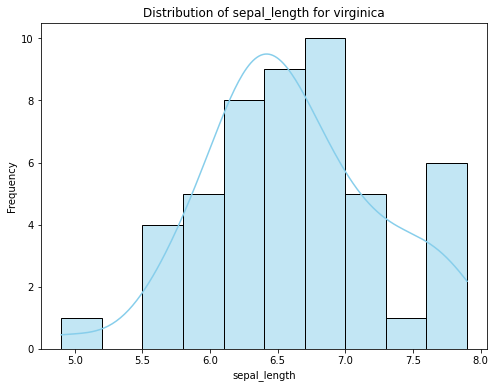

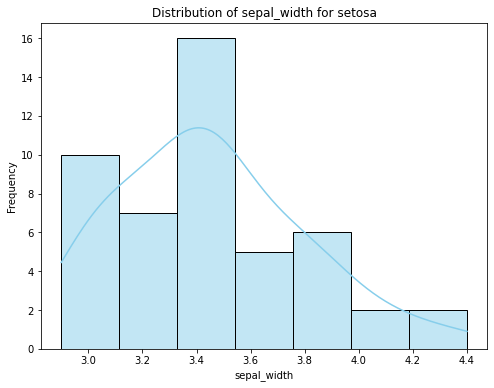

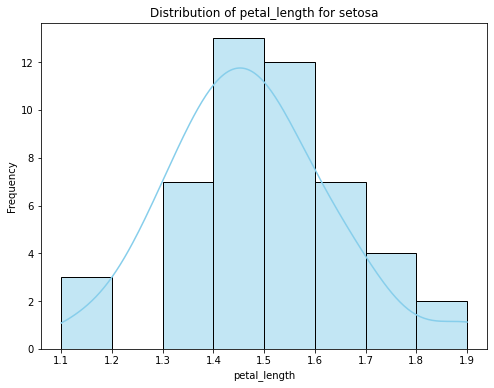

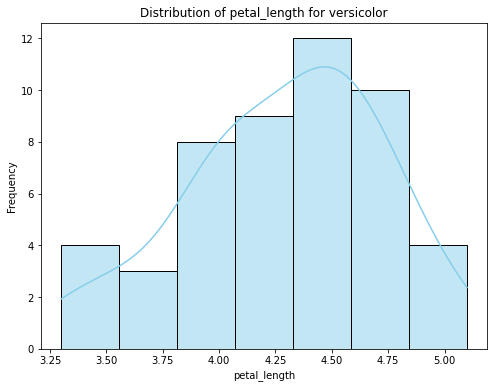

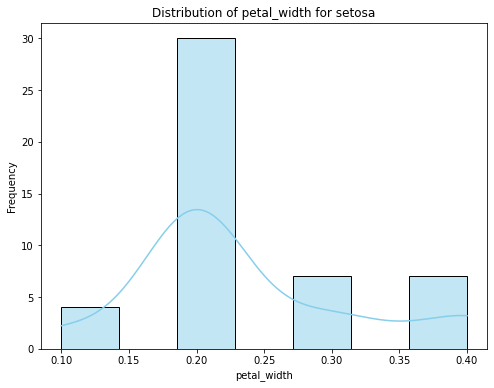

In [8]:
# Impute the Outliers
Q1_sepal_length = df[df['species'] == 'virginica']['sepal_length'].quantile(0.25)
Q3_sepal_length = df[df['species'] == 'virginica']['sepal_length'].quantile(0.75)
IQR_sepal_length = Q3_sepal_length - Q1_sepal_length
upper_bound_sepal_length = Q3_sepal_length + 1.5 * IQR_sepal_length
lower_bound_sepal_length = Q1_sepal_length - 1.5 * IQR_sepal_length

Q1_sepal_width = df[df['species'] == 'setosa']['sepal_width'].quantile(0.25)
Q3_sepal_width = df[df['species'] == 'setosa']['sepal_width'].quantile(0.75)
IQR_sepal_width = Q3_sepal_width - Q1_sepal_width
lower_bound_sepal_width = Q1_sepal_width - 1.5 * IQR_sepal_width

Q1_petal_length_setosa = df[df['species'] == 'setosa']['petal_length'].quantile(0.25)
Q3_petal_length_setosa = df[df['species'] == 'setosa']['petal_length'].quantile(0.75)
IQR_petal_length_setosa = Q3_petal_length_setosa - Q1_petal_length_setosa
lower_bound_petal_length_setosa = Q1_petal_length_setosa - 1.5 * IQR_petal_length_setosa

Q1_petal_length_versicolor = df[df['species'] == 'versicolor']['petal_length'].quantile(0.25)
Q3_petal_length_versicolor = df[df['species'] == 'versicolor']['petal_length'].quantile(0.75)
IQR_petal_length_versicolor = Q3_petal_length_versicolor - Q1_petal_length_versicolor
lower_bound_petal_length_versicolor = Q1_petal_length_versicolor - 1.5 * IQR_petal_length_versicolor

Q1_petal_width = df[df['species'] == 'setosa']['petal_width'].quantile(0.25)
Q3_petal_width = df[df['species'] == 'setosa']['petal_width'].quantile(0.75)
IQR_petal_width = Q3_petal_width - Q1_petal_width
upper_bound_petal_width_setosa = Q3_petal_width + 1.5 * IQR_petal_width



mean_sepal_length_virginica = df[df['species'] == 'virginica']['sepal_length'].mean()
df.loc[(df['species'] == 'virginica') & (df['sepal_length'] > upper_bound_sepal_length) & (df['sepal_length'] < lower_bound_sepal_length) , 'sepal_length'] = mean_sepal_length_virginica
plot_distribution(df, 'sepal_length', 'virginica')

mean_sepal_width_setosa = df[df['species'] == 'setosa']['sepal_width'].mean()
df.loc[(df['species'] == 'setosa') & (df['sepal_width'] < lower_bound_sepal_width), 'sepal_width'] = mean_sepal_width_setosa
plot_distribution(df, 'sepal_width', 'setosa')

mean_petal_length_setosa = df[df['species'] == 'setosa']['petal_length'].mean()
df.loc[(df['species'] == 'setosa') & (df['petal_length'] < lower_bound_petal_length_setosa), 'petal_length'] = mean_petal_length_setosa
plot_distribution(df, 'petal_length', 'setosa')

median_petal_length_versicolor = df[df['species'] == 'versicolor']['petal_length'].median()
df.loc[(df['species'] == 'versicolor') & (df['petal_length'] < lower_bound_petal_length_versicolor), 'petal_length'] = median_petal_length_versicolor
plot_distribution(df, 'petal_length', 'versicolor')

median_petal_width_setosa = df[df['species'] == 'setosa']['petal_width'].median()
df.loc[(df['species'] == 'setosa') & (df['petal_width'] > upper_bound_petal_width_setosa), 'petal_width'] = median_petal_width_setosa
plot_distribution(df, 'petal_width', 'setosa')

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [9]:
X = df.drop('species', axis=1)
y = df['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [12]:
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [13]:
y_pred_test_logistic = logistic_model.predict(X_test_scaled)
print(y_pred_test_logistic)

['virginica' 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'virginica']


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred_test_logistic)
print("Confusion Matrix")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred_test_logistic)
print("Accuracy Score:", accuracy)

Confusion Matrix
[[5 0 0]
 [0 4 1]
 [0 1 4]]
Accuracy Score: 0.8666666666666667


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [15]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

Uji hasil model dengan data test

In [16]:
y_pred_test_nb = nb_model.predict(X_test_scaled)
print(y_pred_test_nb)

['virginica' 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'virginica']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix_nb = confusion_matrix(y_test, y_pred_test_nb)
print("Confusion Matrix:")
print(conf_matrix)

accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)
print("Accuracy:", accuracy_test_nb)

Confusion Matrix:
[[5 0 0]
 [0 4 1]
 [0 1 4]]
Accuracy: 0.8666666666666667


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [19]:
y_pred_test_knn = knn_model.predict(X_test_scaled)
print(y_pred_test_knn)

['virginica' 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'virginica']


Ukur akurasi dari model K-Nearest Neighbor

In [20]:
from sklearn.metrics import accuracy_score

accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
print("Accuracy Score:", accuracy_test_knn)

Accuracy Score: 0.8666666666666667


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) memiliki nilai akurasi yang sama besar.